# Prediksi dan Clustering Polusi Udara di Jakarta

## Dataset

| Kolom | Deskripsi |
|--------|-------------|
| `tanggal` | Tanggal pengambilan kualitas udara (YYYY-MM-DD) |
| `stasiun` | Stasiun pemantauan kualitas udara |
| `pm10` | Konsentrasi partikel udara yang berdiameter kurang dari 10 mikrometer (µg/m³) |
| `so2` | Konsentrasi sulfur dioksida di udara (µg/m³) |
| `co` | Konsentrasi karbon monoksida di udara (µg/m³) |
| `o3` | Konsentrasi ozon di permukaan tanah (µg/m³) |
| `no2` | Konsentrasi nitrogen dioksida di udara (µg/m³) | 
| `max` | Nilai maksimum dari konsentrasi polutan |
| `critical` | Polutan yang mencapai nilai maksimum |
| `categori` | Kategori kualitas udara berdasarkan konsentrasi polutan yang ada |

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('./indeks-standar-pencemar-udara-di-spku-dataset.csv')
df.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK


In [71]:
df.shape

(1830, 10)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1830 non-null   object 
 1   stasiun   1830 non-null   object 
 2   pm10      1830 non-null   object 
 3   so2       1830 non-null   object 
 4   co        1830 non-null   object 
 5   o3        1830 non-null   object 
 6   no2       1830 non-null   object 
 7   max       1826 non-null   float64
 8   critical  1814 non-null   object 
 9   categori  1830 non-null   object 
dtypes: float64(1), object(9)
memory usage: 143.1+ KB


In [73]:
pollutants = ['pm10', 'so2', 'co', 'o3', 'no2']

for pollutant in pollutants:
    df[pollutant] = df[pollutant].replace('---', np.nan).astype(float)
    df[pollutant].fillna(df[pollutant].median(), inplace=True)
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1830 non-null   object 
 1   stasiun   1830 non-null   object 
 2   pm10      1830 non-null   float64
 3   so2       1830 non-null   float64
 4   co        1830 non-null   float64
 5   o3        1830 non-null   float64
 6   no2       1830 non-null   float64
 7   max       1826 non-null   float64
 8   critical  1814 non-null   object 
 9   categori  1830 non-null   object 
dtypes: float64(6), object(4)
memory usage: 143.1+ KB
None


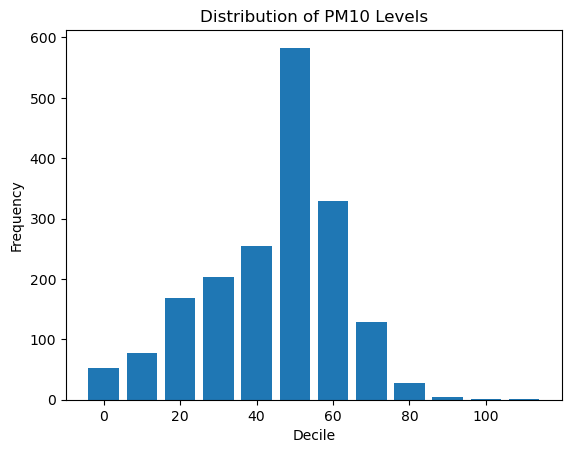

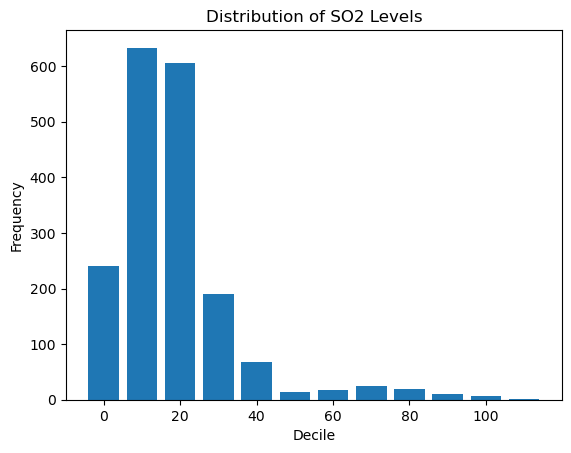

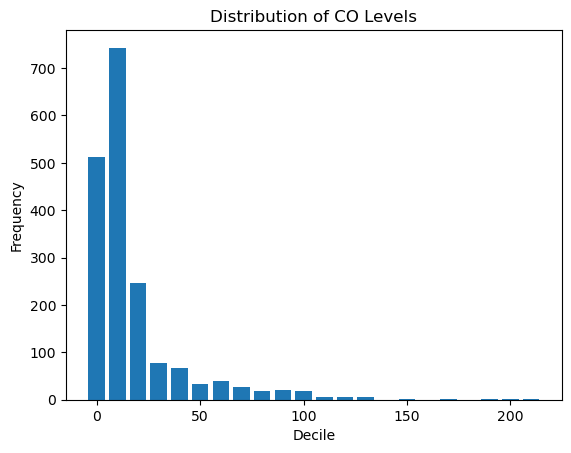

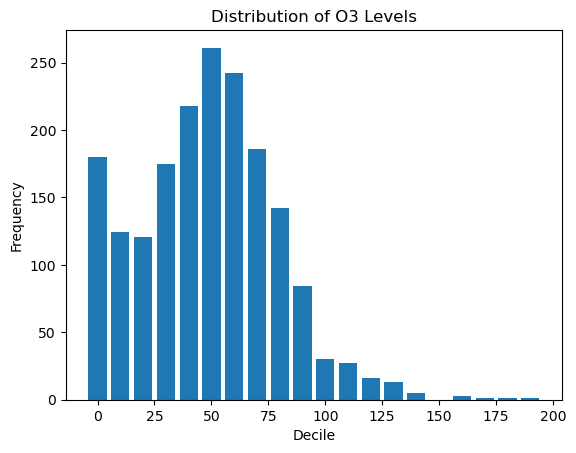

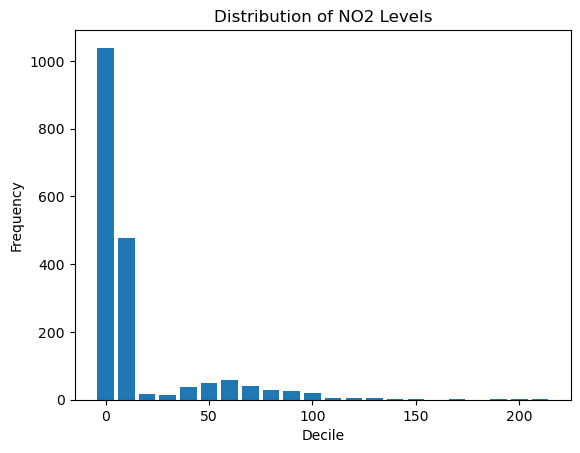

In [74]:
from collections import Counter

for pollutant in df[pollutants]:
    decile = lambda pollutant : pollutant // 10 * 10
    histo = Counter(decile(value) for value in df[pollutant])

    plt.bar(histo.keys(), histo.values(), 8)
    plt.xlabel("Decile")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {pollutant.upper()} Levels")
    plt.show()


<Axes: xlabel='categori', ylabel='count'>

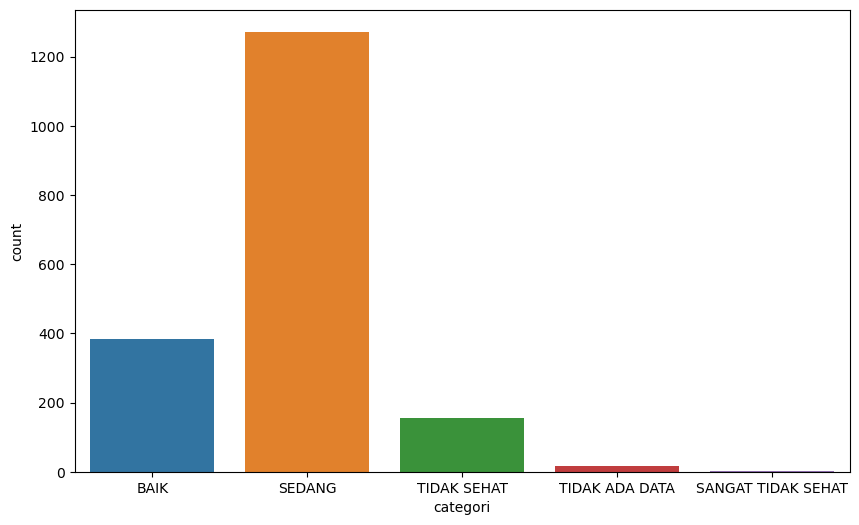

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['categori'], label='air category')

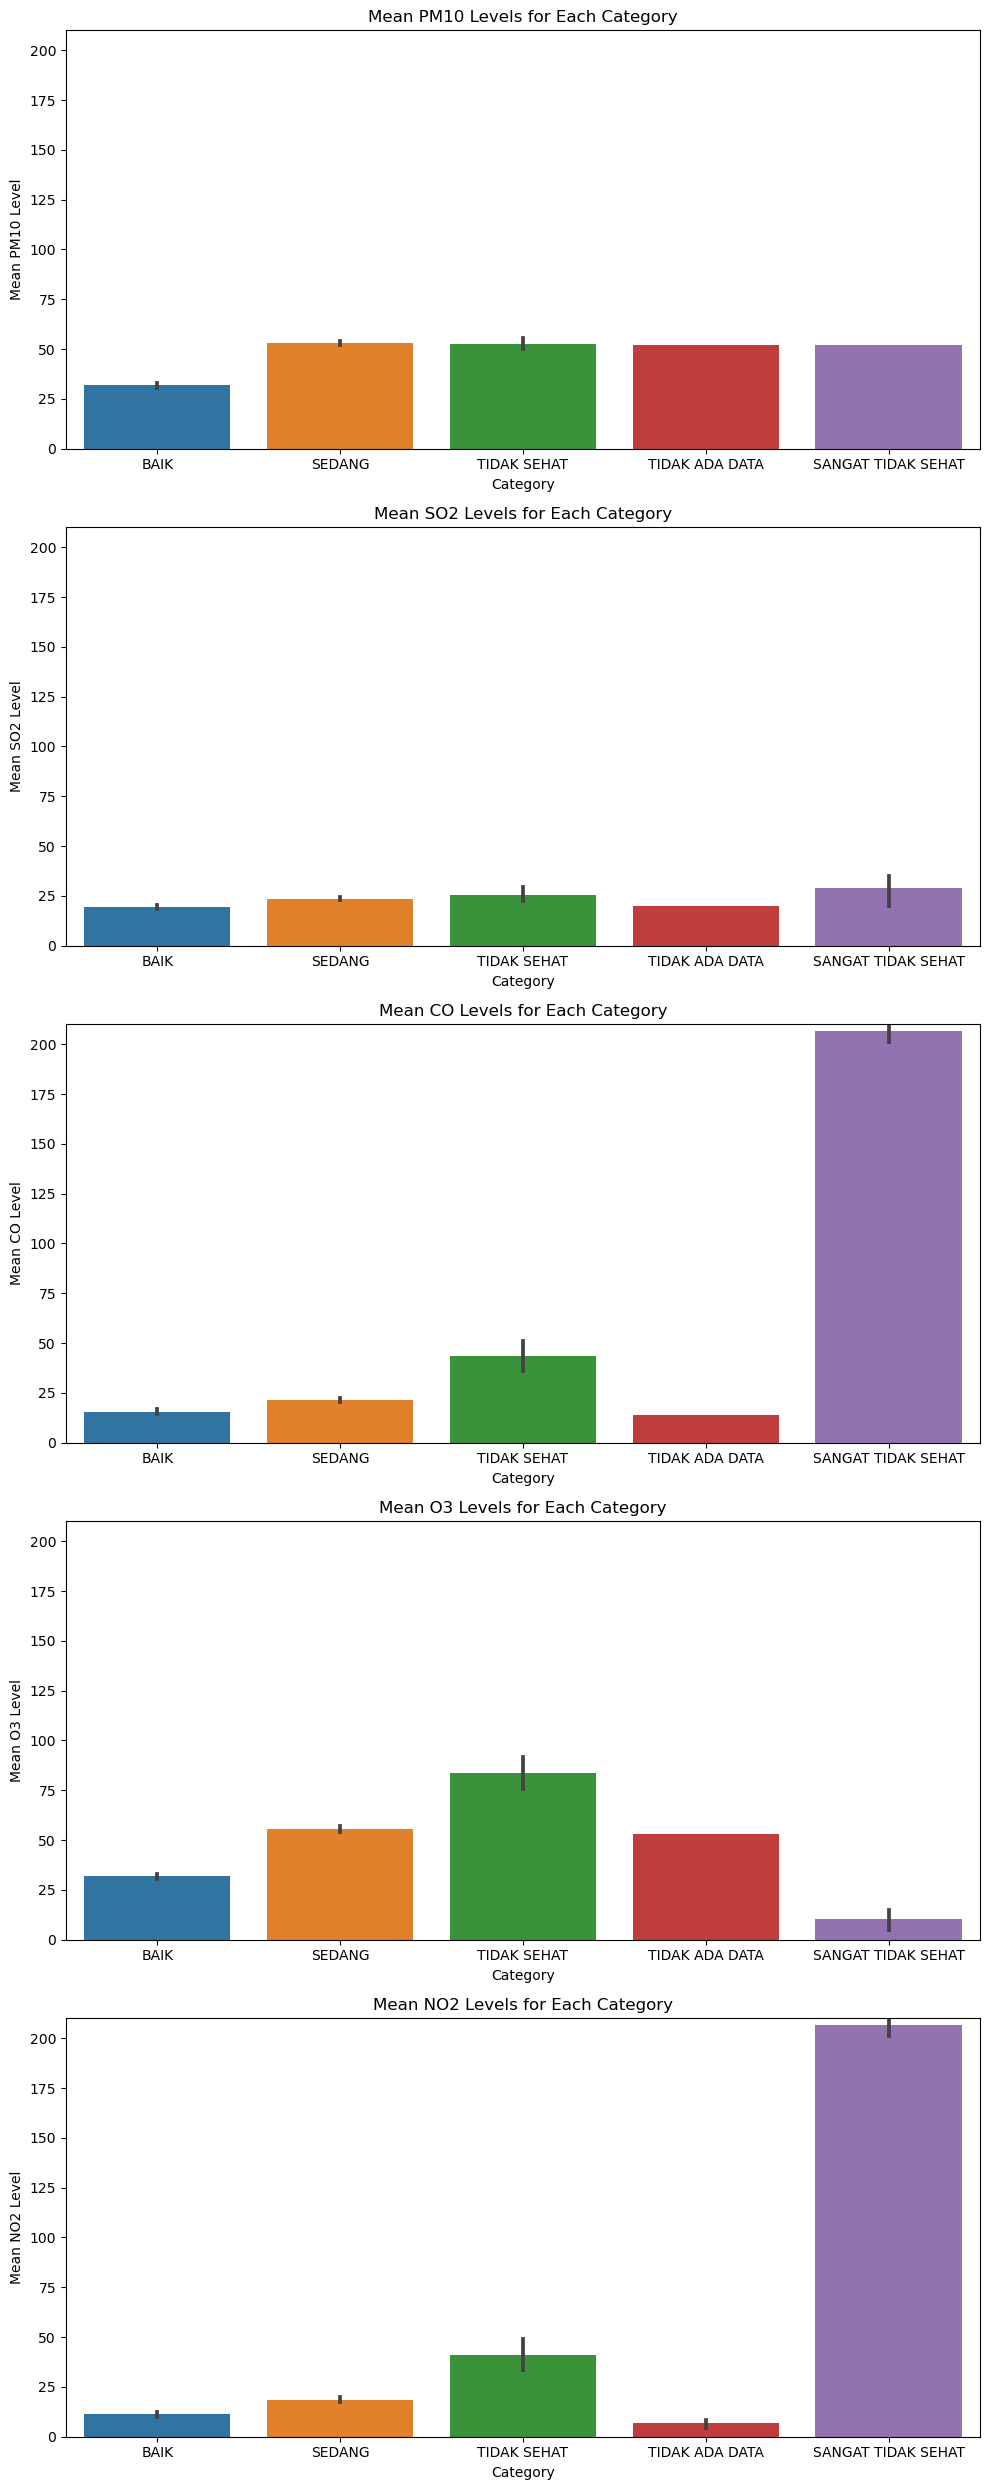

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of pollutants
pollutants = ['pm10', 'so2', 'co', 'o3', 'no2']

# Create subplots
fig, axes = plt.subplots(nrows=len(pollutants), ncols=1, figsize=(10, len(pollutants)*5))

# Plot bar plots for each pollutant
for i, pollutant in enumerate(pollutants):
    sns.barplot(data=df, x='categori', y=pollutant, ax=axes[i])
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel(f"Mean {pollutant.upper()} Level")
    axes[i].set_title(f"Mean {pollutant.upper()} Levels for Each Category")
    axes[i].set_ylim(0, 210)  # Set y-axis limits from 0 to 200

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [77]:
df.drop(df[df['categori'] == 'TIDAK ADA DATA'].index, inplace=True)

In [78]:
df['categori'].value_counts()

SEDANG                1272
BAIK                   385
TIDAK SEHAT            154
SANGAT TIDAK SEHAT       3
Name: categori, dtype: int64

In [79]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['BAIK', 'SEDANG', 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT']

oe = OrdinalEncoder(categories=[categories])
df['categori_enc'] = oe.fit_transform(df[['categori']])
df['categori_enc'].value_counts()

1.0    1272
0.0     385
2.0     154
3.0       3
Name: categori_enc, dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814 entries, 0 to 1829
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tanggal       1814 non-null   object 
 1   stasiun       1814 non-null   object 
 2   pm10          1814 non-null   float64
 3   so2           1814 non-null   float64
 4   co            1814 non-null   float64
 5   o3            1814 non-null   float64
 6   no2           1814 non-null   float64
 7   max           1814 non-null   float64
 8   critical      1814 non-null   object 
 9   categori      1814 non-null   object 
 10  categori_enc  1814 non-null   float64
dtypes: float64(7), object(4)
memory usage: 170.1+ KB


In [81]:
df.drop(['categori', 'tanggal', 'stasiun', 'critical'], axis=1, inplace=True)
df.head()

,pm10,so2,co,o3,no2,max,categori_enc
0,30.0,20.0,10.0,32.0,9.0,32.0,0.0
1,27.0,22.0,12.0,29.0,8.0,29.0,0.0
2,39.0,22.0,14.0,32.0,10.0,39.0,0.0
3,34.0,22.0,14.0,38.0,10.0,38.0,0.0
4,35.0,22.0,12.0,31.0,9.0,35.0,0.0


<Axes: >

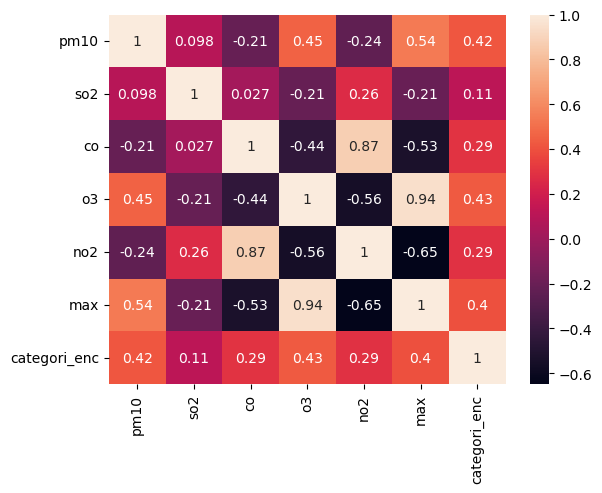

In [82]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)

In [83]:
df.head()

,pm10,so2,co,o3,no2,max,categori_enc
0,30.0,20.0,10.0,32.0,9.0,32.0,0.0
1,27.0,22.0,12.0,29.0,8.0,29.0,0.0
2,39.0,22.0,14.0,32.0,10.0,39.0,0.0
3,34.0,22.0,14.0,38.0,10.0,38.0,0.0
4,35.0,22.0,12.0,31.0,9.0,35.0,0.0


In [84]:
from sklearn.model_selection import train_test_split

X = df.drop(['categori_enc'], axis=1)
y = df['categori_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=9)

In [85]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svc': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [86]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

c:\Users\Aryo Sasi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Aryo Sasi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Aryo Sasi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [87]:
df_score = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_score

,model,best_score,best_params
0,svc,0.712615,{'C': 10}
1,random_forest,0.993108,{'n_estimators': 5}
2,logistic_regression,0.911783,{'C': 10}


In [88]:
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        77
         1.0       1.00      1.00      1.00       254
         2.0       1.00      0.97      0.98        31
         3.0       1.00      1.00      1.00         1

    accuracy                           1.00       363
   macro avg       1.00      0.99      1.00       363
weighted avg       1.00      1.00      1.00       363



In [89]:
df_cluster = df.drop(['categori_enc'], axis=1)
df_cluster

,pm10,so2,co,o3,no2,max
0,30.0,20.0,10.0,32.0,9.0,32.0
1,27.0,22.0,12.0,29.0,8.0,29.0
2,39.0,22.0,14.0,32.0,10.0,39.0
3,34.0,22.0,14.0,38.0,10.0,38.0
4,35.0,22.0,12.0,31.0,9.0,35.0
...,...,...,...,...,...,...
1825,18.0,32.0,4.0,41.0,9.0,41.0
1826,22.0,33.0,5.0,35.0,3.0,35.0
1827,15.0,28.0,4.0,27.0,9.0,28.0
1828,16.0,7.0,3.0,21.0,2.0,21.0


In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)
df_cluster_preprocessed =  pd.DataFrame(data=X, columns=df_cluster.columns)
df_cluster_preprocessed

,pm10,so2,co,o3,no2,max
0,-1.063290,-0.182099,-0.498984,-0.696213,-0.373148,-0.814244
1,-1.234730,-0.055294,-0.417306,-0.795989,-0.409807,-0.911296
2,-0.548972,-0.055294,-0.335628,-0.696213,-0.336490,-0.587789
3,-0.834704,-0.055294,-0.335628,-0.496661,-0.336490,-0.620139
4,-0.777558,-0.055294,-0.417306,-0.729471,-0.373148,-0.717192
...,...,...,...,...,...,...
1809,-1.749048,0.578732,-0.744018,-0.396885,-0.373148,-0.523087
1810,-1.520462,0.642135,-0.703179,-0.596437,-0.593097,-0.717192
1811,-1.920487,0.325122,-0.744018,-0.862506,-0.373148,-0.943647
1812,-1.863341,-1.006333,-0.784857,-1.062057,-0.629755,-1.170102


In [91]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
dfx_pca = pca.fit(df_cluster_preprocessed)
dfx_pca.explained_variance_ratio_

array([0.5477655 , 0.18857035, 0.16153804, 0.08030123, 0.01491554,
       0.00690935])

In [92]:
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components = n_components)
polution_PCA = pca.fit_transform(df_cluster_preprocessed)

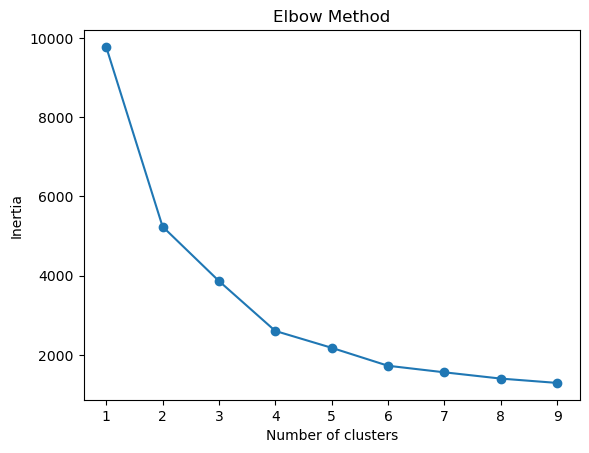

In [93]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state=42).fit(polution_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


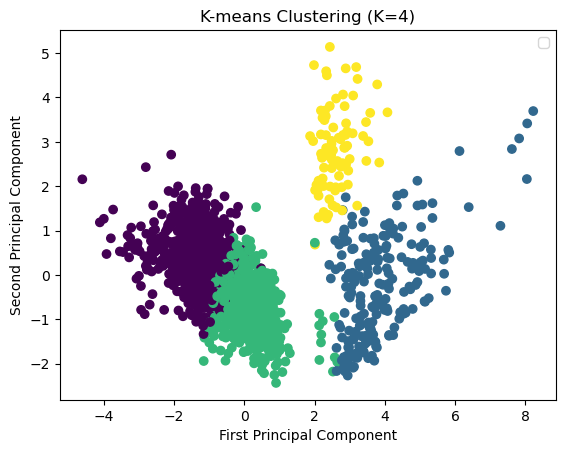

In [94]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(polution_PCA)
plt.scatter(polution_PCA[:,0], polution_PCA[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()


In [95]:
df_cluster

,pm10,so2,co,o3,no2,max
0,30.0,20.0,10.0,32.0,9.0,32.0
1,27.0,22.0,12.0,29.0,8.0,29.0
2,39.0,22.0,14.0,32.0,10.0,39.0
3,34.0,22.0,14.0,38.0,10.0,38.0
4,35.0,22.0,12.0,31.0,9.0,35.0
...,...,...,...,...,...,...
1825,18.0,32.0,4.0,41.0,9.0,41.0
1826,22.0,33.0,5.0,35.0,3.0,35.0
1827,15.0,28.0,4.0,27.0,9.0,28.0
1828,16.0,7.0,3.0,21.0,2.0,21.0


In [98]:
df_cluster['label'] = kmeans.labels_
df_cluster

,pm10,so2,co,o3,no2,max,label
0,30.0,20.0,10.0,32.0,9.0,32.0,2
1,27.0,22.0,12.0,29.0,8.0,29.0,2
2,39.0,22.0,14.0,32.0,10.0,39.0,2
3,34.0,22.0,14.0,38.0,10.0,38.0,2
4,35.0,22.0,12.0,31.0,9.0,35.0,2
...,...,...,...,...,...,...,...
1825,18.0,32.0,4.0,41.0,9.0,41.0,2
1826,22.0,33.0,5.0,35.0,3.0,35.0,2
1827,15.0,28.0,4.0,27.0,9.0,28.0,2
1828,16.0,7.0,3.0,21.0,2.0,21.0,2


In [99]:
print(df_cluster.columns)

Index(['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'label'], dtype='object')


In [100]:
numeric_columns = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']
stat_polution = df_cluster.groupby('label')[numeric_columns].mean()
print(stat_polution)

            pm10        so2         co         o3        no2        max
label                                                                  
0      59.926606  20.970183  15.027523  75.723624   8.888761  81.029817
1      28.607656  18.808612  76.961722   8.755981  79.157895   3.459330
2      39.167692  19.473846  13.452308  41.583077   8.110769  48.104615
3      53.951807  79.698795  28.566265  13.626506  62.939759  12.722892


In [106]:
df.head()

,pm10,so2,co,o3,no2,max,categori_enc
0,30.0,20.0,10.0,32.0,9.0,32.0,0.0
1,27.0,22.0,12.0,29.0,8.0,29.0,0.0
2,39.0,22.0,14.0,32.0,10.0,39.0,0.0
3,34.0,22.0,14.0,38.0,10.0,38.0,0.0
4,35.0,22.0,12.0,31.0,9.0,35.0,0.0


In [102]:
stat_polution.head()

,pm10,so2,co,o3,no2,max
label,,,,,,
0,59.926606,20.970183,15.027523,75.723624,8.888761,81.029817
1,28.607656,18.808612,76.961722,8.755981,79.157895,3.459330
2,39.167692,19.473846,13.452308,41.583077,8.110769,48.104615
3,53.951807,79.698795,28.566265,13.626506,62.939759,12.722892


In [107]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, mutual_info_score, adjusted_rand_score

silhouette = silhouette_score(X, kmeans.labels_)
db_index = davies_bouldin_score(X, kmeans.labels_)
ch_index = calinski_harabasz_score(X, kmeans.labels_)
ari = adjusted_rand_score(df.categori_enc, kmeans.labels_)
mi = mutual_info_score(df.categori_enc, kmeans.labels_)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}") # range from -1 to 1, a score close to 1 suggests well separated clusters
print(f"Davies-Bouldin Index: {db_index:.2f}") # lower numbers suggest better clustering solutions
print(f"Calinski-Harabasz Index: {ch_index:.2f}") # higher number suggest better defined clusters
print(f"Adjusted Rand Index: {ari:.2f}") # range from -1 to 1, where 1 indicates perfect clustering
print(f"Mutual Information (MI): {mi:.2f}") # higher values indicate better alignment between clusters and true labels

Silhouette Score: 0.33
Davies-Bouldin Index: 0.96
Calinski-Harabasz Index: 1177.90
Adjusted Rand Index: 0.20
Mutual Information (MI): 0.25
